# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [15]:
data = pd.read_csv(r'Mall_Customers.csv')
data.shape

(200, 5)

In [19]:
X = data.iloc[:,3:].values
for i in range(0,10):
    print(X[i])

[15 39]
[15 81]
[16  6]
[16 77]
[17 40]
[17 76]
[18  6]
[18 94]
[19  3]
[19 72]


## Using the elbow method to find the optimal number of clusters

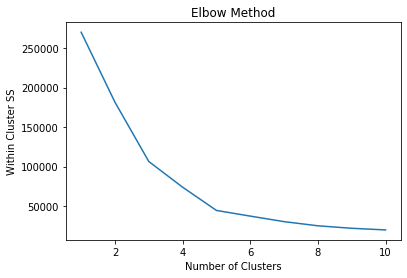

In [17]:
from sklearn.cluster import KMeans
wcss = [] # within class sum of squares
for i in range(1,11):
    kmeans_model = KMeans(n_clusters=i, init = 'k-means++', random_state = 42, n_init=5)
    kmeans_model.fit(X)
    wcss.append(kmeans_model.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster SS')
plt.title('Elbow Method')
plt.show()

According to Elbow Method, we should choose k = 5 

## Training the K-Means model on the dataset

In [21]:
final_kmeans_model = KMeans(n_clusters=5, init = 'k-means++', random_state = 42)
y_means = final_kmeans_model.fit_predict(X)
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

## Visualising the clusters

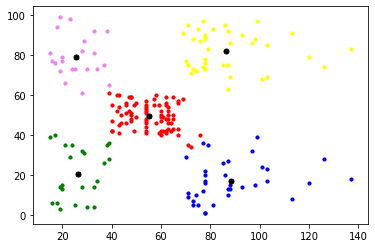

In [38]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], s = 10, color = 'red', label = 'Cluster 1')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], s = 10, color = 'blue', label = 'Cluster 2')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], s = 10, color = 'green', label = 'Cluster 3')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], s = 10, color = 'violet', label = 'Cluster 4')
plt.scatter(X[y_means == 4,0], X[y_means == 4,1], s = 10, color = 'yellow', label = 'Cluster 5')
plt.scatter(final_kmeans_model.cluster_centers_[:,0], final_kmeans_model.cluster_centers_[:,1], s = 25, color = 'black', label = 'centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score(1-100)')